## <span style=color:red><b>Tasca M8 T01</b></span> 

### <span style=color:red><b>Exercicis d'algoritmes d'Agrupació.</b></span> 

- [x] <span style=color:red><b>__Exercici 1:__</b></span>
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

__Important:__ _Tingues en compte que prèviament et caldrà preparar el dataset._


## __K-Means Clustering__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Publicacions Facebook Thailandia.csv')
db=df.copy()

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [2]:
db.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Como las cuatro columnas del final no tienen nada de información, las eliminamos

db = db.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1) 

db.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
db.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [6]:
db.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

De los tres atributos que son variables categóricas, dos de ellos, _status_id_ y _status_published_, no nos sirven para los modelos que queremos implementar, de manera que los eliminamos de nuestro data frame.

In [7]:
db = db.drop(columns=['status_id', 'status_published'], axis=1) 

db.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


La variable categórica que hace referencia al tipo de publicación, que corresponde a cuatro tipos:

In [137]:
db['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [138]:
db1=db.copy()
db1.groupby('status_type')[['status_type']].count()

,status_type
status_type,
link,63
photo,4288
status,365
video,2334


Sí nos da información que nos puede servir en el análisis, por lo tanto la convertimos en variable numérica (número entero) del siguiente modo:

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
db['status_type']=le.fit_transform(db['status_type'])
db.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [140]:
db2=db.copy()
db2.groupby('status_type')[['status_type']].count()

,status_type
status_type,
0,63
1,4288
2,365
3,2334


- __0__: Link
- __1__: Photo
- __2__: Status
- __3__: Video

Text(0.5, 1.0, 'Correlation Heatmap')

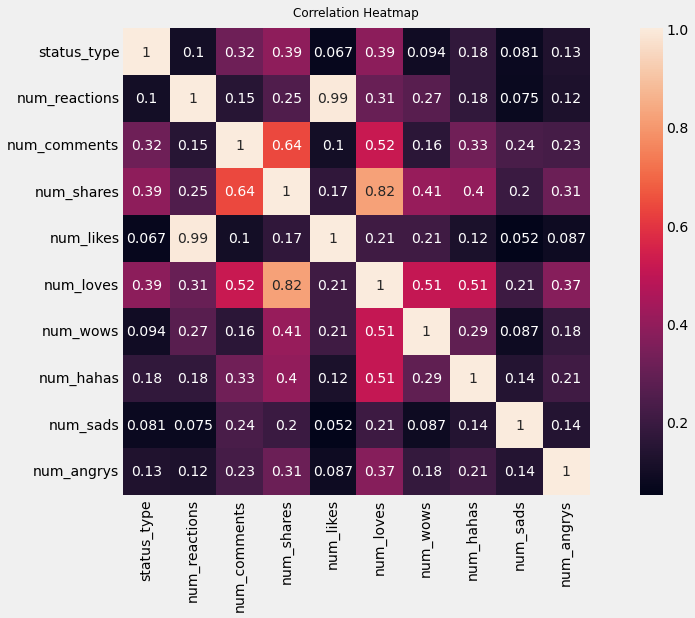

In [141]:
import seaborn as sns
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(db.corr(), square=True, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Principal Component Analysis (PCA) 
Vamos a utilizar la técnica de reducción de dimensionalidad (dimensionality reduction) PCA. PCA transforma los datos al proyectarlos en un número menor de domensiones llamadas componentes.

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
preprocessor = Pipeline(
    [
        ("scaler", RobustScaler()),
        ("pca", PCA(n_components=2, random_state=1)),
    ]
)

In [20]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=1,
           ),
       ),
   ]
)

In [21]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [22]:
pipe.fit(db)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', RobustScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=1))]))])

In [23]:
preprocessed_data = pipe["preprocessor"].transform(db)

predicted_labels = pipe["clusterer"]["kmeans"].labels_


In [24]:
silhouette_scores = []
#ari_scores = []
for n in range(2, 11):
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(db)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(db),
        pipe["clusterer"]["kmeans"].labels_,
    )
    
    silhouette_scores.append(silhouette_coef)


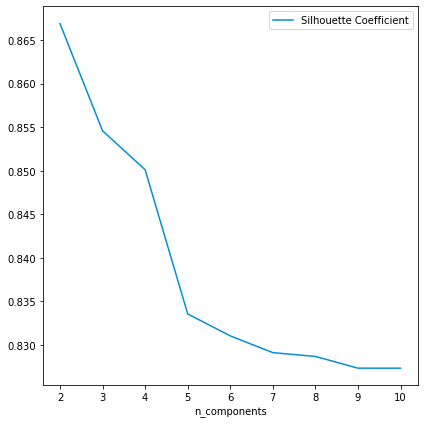

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)

plt.xlabel("n_components")
plt.legend()

plt.tight_layout()
plt.show()

Por lo tanto usaremos 2 componentes.

<AxesSubplot:xlabel='num_reactions', ylabel='num_likes'>

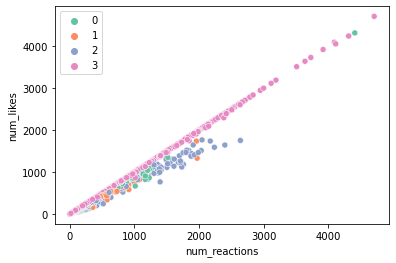

In [29]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_reactions', y='num_likes', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_comments', ylabel='num_shares'>

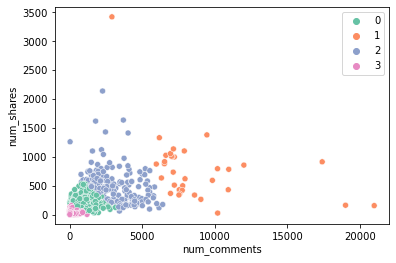

In [30]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_comments', y='num_shares', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_comments', ylabel='num_loves'>

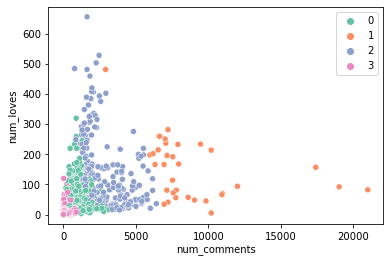

In [31]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_comments', y='num_loves', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_shares', ylabel='num_loves'>

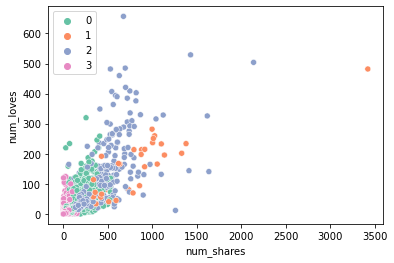

In [32]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_shares', y='num_loves', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_loves', ylabel='num_wows'>

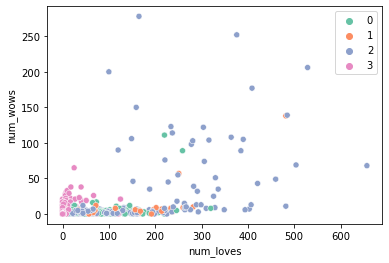

In [33]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_loves', y='num_wows', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_loves', ylabel='num_hahas'>

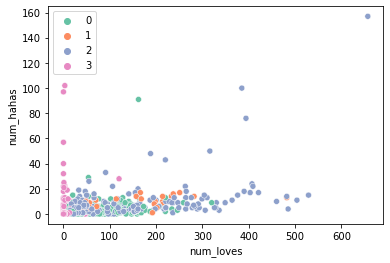

In [34]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_loves', y='num_hahas', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_wows', ylabel='num_hahas'>

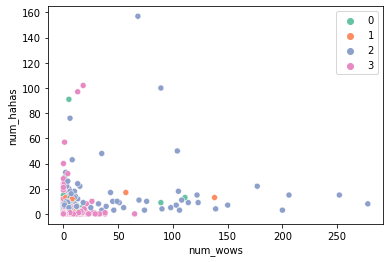

In [35]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_wows', y='num_hahas', hue=predicted_labels, data=db, legend='full',palette='Set2')


<AxesSubplot:xlabel='num_angrys', ylabel='num_sads'>

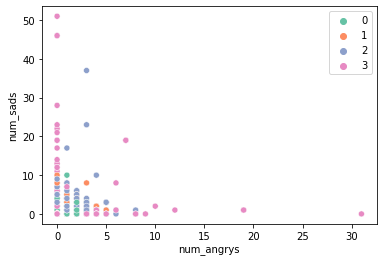

In [36]:
from sklearn.cluster import KMeans
sns.scatterplot(x='num_angrys', y='num_sads', hue=predicted_labels, data=db, legend='full',palette='Set2')


___

- [X] <span style=color:red><b>__Exercici 2:__</b></span>
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


In [37]:
db2=db.copy()
from sklearn.decomposition import PCA
x=db2.drop(['status_type'],axis=1)
Y=db[['status_type']]

Text(0, 0.5, 'Cumulative explained variance')

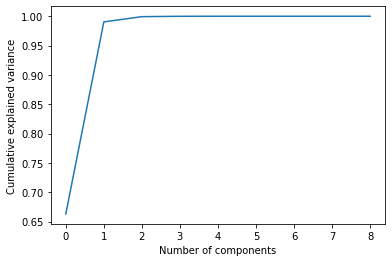

In [38]:
#Hacemos esto para elegir el número de componentes

pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Por lo tanto basta con considerar una componente.

In [39]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente principal'])
principalDf.head()

,Componente principal
0,372.669904
1,-242.585457
2,11.501158
3,-252.700910
4,-227.065240


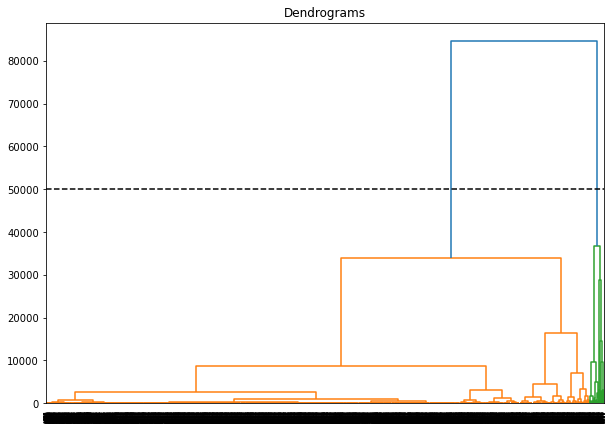

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))
plt.axhline(y=50000, color='k', linestyle='--')

La línea corta el dendrogram en dos puntos. Ahora aplicamos el clustering jerárquico para dos clusters. Aunque también podemos analizarlo utilizando el método de silhouette.

In [42]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []

for n in range(2, 11):
    modelo = AgglomerativeClustering(n_clusters = n, affinity = "euclidean", linkage = "ward")
    cluster_labels = modelo.fit_predict(principalDf)
    silhouette_coef= silhouette_score(principalDf, cluster_labels)
    silhouette_scores.append(silhouette_coef)
   

Text(0, 0.5, 'Silhouette score')

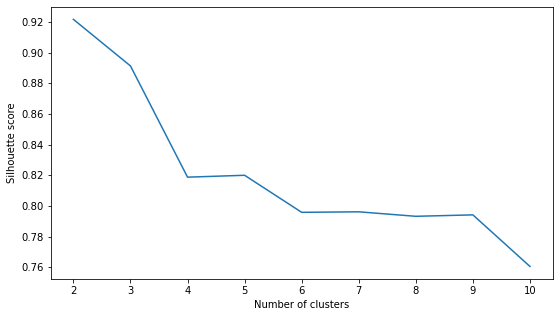

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(range(2, 11), silhouette_scores)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_p=cluster.fit_predict(principalDf)
cluster_p

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
db['Cluster']=cluster_p
db.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,1
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1


In [46]:
db.groupby('Cluster')[['Cluster']].count()

,Cluster
Cluster,
0,181
1,6869


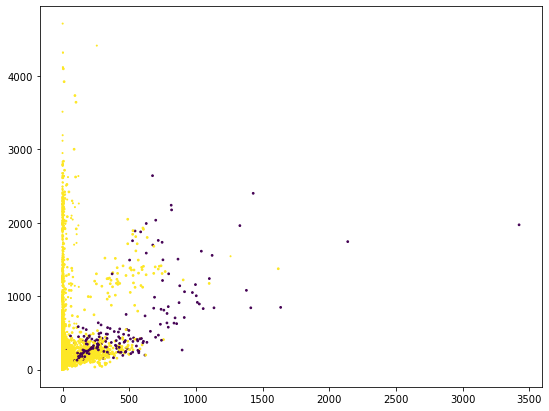

In [47]:
plt.figure(figsize=(9, 7))  
plt.scatter(db['num_shares'],  db['num_reactions'], db['status_type'], c=cluster.labels_) 


- [X] <span style=color:red><b>__Exercici 3:__</b></span>
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

### Silhouette en el modelo KMeans



In [48]:
silhouette_score(preprocessed_data, predicted_labels)


0.86688021881218

Este coeficiente nos indica que los clusters están bien separados.

### Silhouette en el modelo jerárquico



In [49]:
silhouette_score(principalDf,cluster.labels_)


0.9216816293187426